# Introduction - Deep Learning

Classical programming is all about creating a function that helps us to process input data and get the desired output.

In the learning paradigm, we change the process so that given a set of examples of input data and desired output, we aim to learn the function that can process the data.

- In machine learning, we end up handcrafting the features and then learn the function to get the desired output
- In deep learning, we want to both learn the features and the function together to get the desired output

![Learning Paradigm](img/learning_paradigm.png)

Lets take an example to understand both the learning paradigms - Machine Learning and Deep Learning

We will be starting with a classification exercise. And using the **Fashion Mnist** dataset to do so. It involves identifying the 10 types of products that are there in the image.

- Train: 60,000 images
- Test: 10,000 images
- Class: 10
- Labels: 
 - 0: T-shirt/top
 - 1: Trouser
 - 2: Pullover
 - 3: Dress
 - 4: Coat
 - 5: Sandal
 - 6: Shirt
 - 7: Sneaker
 - 8: Bag
 - 9: Ankle boot

### Get Input and Output

In [1]:
import numpy as np
import keras
import tensorflow as tf

/Users/amitkaps/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
from helpers import fashion_mnist_label

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
label = fashion_mnist_label()
label

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

### View the Dataset

In [5]:
import matplotlib.pyplot as plt
% matplotlib inline

#### See an Image

In [6]:
# Lets plot a single image
def image(index):
    plt.imshow(x_train[index], cmap="gray")
    plt.title(label[y_train[index]])

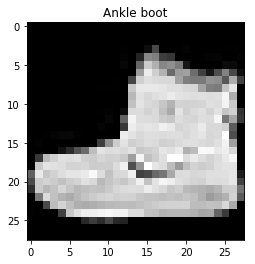

In [7]:
image(0)

### See an Image from each class

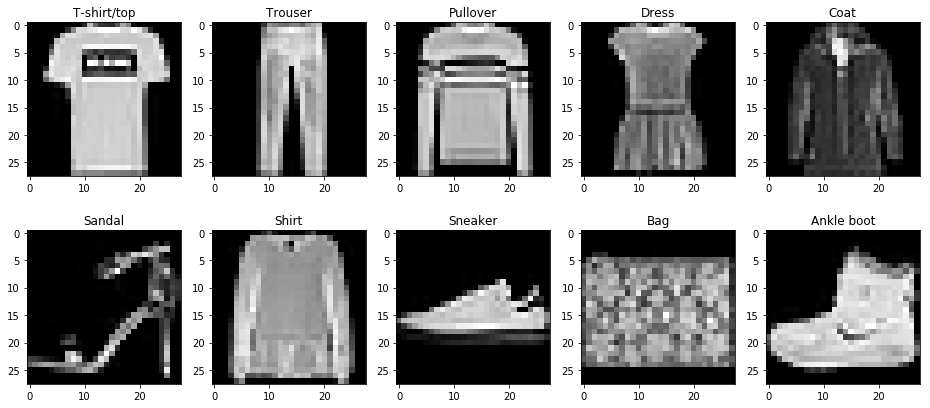

In [8]:
# Lets plot one image from each class
u, indices = np.unique(y_train, return_index=True)
plt.figure(figsize = (16,7))
for i in u:
    plt.subplot(2,5,i+1)
    image(indices[i])

#### See 500 of the Images

In [9]:
from helpers import create_sprite, create_embedding

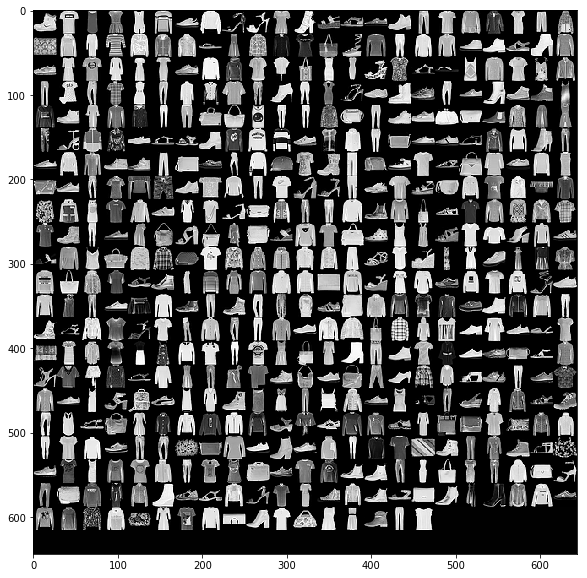

In [10]:
sprite = create_sprite(x_train[:500])
plt.figure(figsize = (10,10))
plt.imshow(sprite,cmap='gray')

In [11]:
x_train[:500].shape

(500, 28, 28)

In [12]:
create_embedding("fashion-mnist", "fashion-mnist-embedding", 500)

Extracting data/fashion-mnist/train-images-idx3-ubyte.gz
Extracting data/fashion-mnist/train-labels-idx1-ubyte.gz
Extracting data/fashion-mnist/t10k-images-idx3-ubyte.gz
Extracting data/fashion-mnist/t10k-labels-idx1-ubyte.gz

    Created embedding in the directory -> logs/fashion-mnist-embedding/ 
    Run the following command from the terminal
    
    tensorboard --logdir=logs/fashion-mnist-embedding/


After running the above command in terminal - you should see the tensorboard running

![Fashion-mnist PCA TensorBoard](img/fashion_pca_tensorboard.png)

## Essense of Classification

In [13]:
x_train_flatten = x_train.reshape(60000, 784)
x_test_flatten = x_test.reshape(10000,784)
#x_train_flatten_normalize = x_train_flatten/255

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x_train_flatten)
x_train_feature_2 = pca.transform(x_train_flatten)

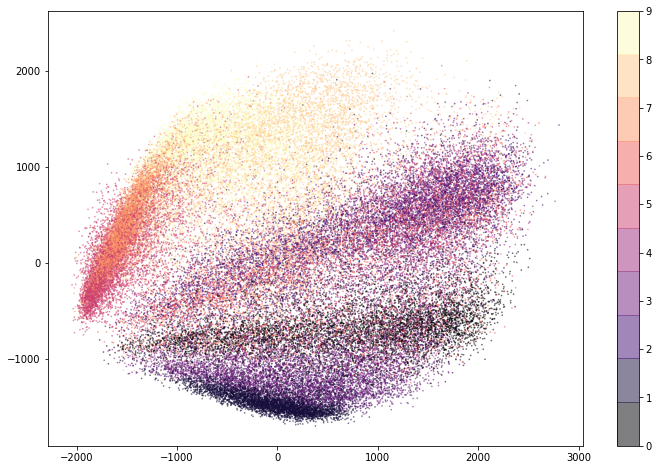

In [15]:
plt.figure(figsize = (12,8))
cmap = plt.cm.get_cmap('magma', 10) 
plt.scatter(x_train_feature_2[:,0], x_train_feature_2[:,1], c=y_train, cmap = cmap, alpha=0.5, s=0.5)
plt.colorbar();

## Machine Learning Approach

### Hand Crafted Features

Lets take craft 100 features (using PCA) and then classify the result

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100).fit(x_train_flatten)
x_train_feature_100 = pca.transform(x_train_flatten)
x_test_feature_100 = pca.transform(x_test_flatten)

In [18]:
x_train_feature_100.shape

(60000, 100)

In [19]:
batch_size = 128
num_classes = 10
epochs=2

In [20]:
# convert class vectors to binary class matrices
y_train_class = keras.utils.to_categorical(y_train, num_classes)
y_test_class = keras.utils.to_categorical(y_test, num_classes)

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, SGD

In [22]:
model = Sequential()
model.add(Dense(10, input_shape=(100,), activation='softmax'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                1010      
Total params: 1,010
Trainable params: 1,010
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

In [26]:
%%time 

model.fit(x_train_feature_100, y_train_class,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_feature_100, y_test_class))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 1s 23us/step - loss: 7.7698 - acc: 0.5160 - val_loss: 6.4165 - val_acc: 0.5995
Epoch 2/2
60000/60000 [==============================] - 1s 18us/step - loss: 5.9722 - acc: 0.6277 - val_loss: 5.8155 - val_acc: 0.6380
CPU times: user 3.34 s, sys: 357 ms, total: 3.7 s
Wall time: 2.62 s
